Convolution in Tensorflow
=========================

From the [documentation](https://www.tensorflow.org/versions/r0.10/api_docs/python/nn.html#conv2d), `conv2d`:

*Computes a 2-D convolution given 4-D input and filter tensors. Given an input tensor of shape [batch, in_height, in_width, in_channels] and a filter / kernel tensor of shape [filter_height, filter_width, in_channels, out_channels]*

For the input tensor, since we're only convolving one image, our `batch = 1`. The `in_height` and `in_width` are the dimensions of the image, (303, 497), and `in_channels = 1` since we have a grayscale image.

For the kernel tensor, the `filter_height` and `filter_width` are the dimensions of the kernel (3, 3). `in_channels = 1` since it has to match the input tensor, and `out_channels = 1` since we want another grayscale image. So I need to reshape my 2-D arrays into this 4-D shape. I'll choose the blur kernel for this example.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
%matplotlib inline

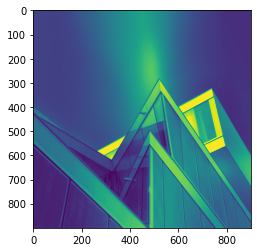

In [63]:
path_rgb = 'rgb.jpg'
path_greyscale = 'greyscale.jpg'
img = mpimg.imread(path_greyscale)
img = img[:, :, 0]
plt.imshow(img)
plt.imshow(img)

In [64]:
x,y = img.shape[0],img.shape[1]
x,y

(900, 900)

In [65]:
img_array_4d = img.reshape(-1,x,y,1)
blur_box_kernel = np.ones((3, 3)) / 9
blur_kernel_4d = blur_box_kernel.reshape(3, 3, 1, 1)

Understanding the next code block requires some knowledge of Tensorflow, so if anyone is interested in learning about it I recommend checking out one of Google's [tutorials](https://www.tensorflow.org/tutorials).

In [66]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

graph = tf.Graph()
with graph.as_default():
    tf_input_image = tf.Variable(np.array(img_array_4d, dtype = np.float32))
    tf_blur_kernel = tf.Variable(np.array(blur_kernel_4d, dtype = np.float32))    
    tf_convolution_output = tf.nn.conv2d(tf_input_image, tf_blur_kernel, strides = [1, 1, 1, 1], padding = 'SAME')

with tf.Session(graph = graph) as sess:
    tf.initialize_all_variables().run()
    transformed_image = tf_convolution_output.eval()
    transformed_image = transformed_image[0, :, :, 0]

In the first `with` statement, I initialized the input and kernel tensors (with values as floats) and the convolution. In the second `with` statement, I executed the tensorflow `graph` and evaluated the convolution. `Conv2d` also needs parameters `strides` and `padding`. `strides = [1, 1, 1, 1]` results in a convolution on every pixel and `padding = 'SAME'` is the standard zero padding that results in an output array with the same shape as the input array.


In [67]:
tf_convolution_output.shape

TensorShape([Dimension(1), Dimension(900), Dimension(900), Dimension(1)])

(900, 900)

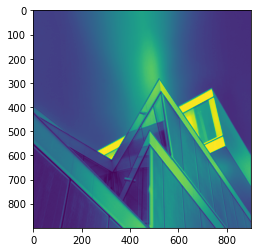

In [68]:
plt.imshow(transformed_image)
img.shape